## T-tests

<p>This notebook walks through exploratory t-tests of English and math SBAC scores for each student group using every district in the sample. This does not utilize any matching logic for a regression discontinuity design, this is only a top level T-test. Additionally, because we are using the prior scores against the current scores, we must draw conclusions with caution due to the context of SBAC scoring implementation, some literature for context is provided in the notebook. </p>

[CausalInference package tutorial](http://www.degeneratestate.org/posts/2018/Mar/24/causal-inference-with-python-part-1-potential-outcomes/)

In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

sns.set_style("whitegrid")
sns.set_palette("colorblind")

%matplotlib inline

In [2]:
gdf = gpd.read_file("clean_data/master.shp")

In [3]:
df = pd.DataFrame(gdf)

In [4]:
df['concentrat'] = df['concentrat'].replace('-', np.nan) 

In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df["concentrat"].fillna("0", inplace = True) 

In [7]:
df["concentrat"].fillna("0", inplace = True)
# filling nan values with 0

def treatment(df): # create treatment function
    if df['concentrat'] == '0':
        return '0'
    else:
        return '1'

df['treatment'] = df.apply(treatment, axis=1)
# execute function to create treatment dummy variable

df.treatment = df.treatment.astype(int)
# change to int, diff_means function wont work otherwise

### Function (diff_means)
Estimate the difference in means between two groups and standard error

In [8]:
def diff_means(df, y='m_curr_ALL'): # enter dataframe, then variable
    
    base = df[df.treatment == 0] # defining control group
    variant = df[df.treatment == 1] # defining treatment group
    
    delta = variant[y].mean() - base[y].mean()   # difference between means
    delta_err = 1.96 * np.sqrt(                  # standard error = square root(variance(Y1) / N(Y1) + variance(Y0) / N(Y0))
        variant[y].var() / variant.shape[0] + 
        base[y].var() / base.shape[0])

    return {"estimated_effect": delta, "standard_error": delta_err}

### Finding difference of means between scores in `prio` and `curr` score variables

We'll use this function to run 2 t-tests on each student group using `m_curr` for current year and `m_prio` for prior year as a pre and post treatment. These could be confounded by the recency of the implementation of 'common core' curricula in academic years 2014-2015, which were expected to result in an overal drop in performance as teachers and students adjust to the new standards. 

[An article providing some context on SBAC and Common Core implementation](https://edsource.org/2019/slow-growth-big-disparities-after-5-years-of-smarter-balanced-tests/618328)

>Overall proficiency rose only about 1 percentage point for English language arts and math, compared with 2 points in 2017-18. After five years of Smarter Balanced, students who met or exceeded standards had increased 7 percentage points in both tests. That’s an average of 1.4 percentage points annually — less after discounting the large second-year bump that reflected familiarity with a new test.

Also...

>Not all of the news is dreary. An EdSource analysis found that increases in English language arts proficiency in districts receiving the most extra funding under the Local Control Funding Formula — those with the most low-income students, foster youth and English learners — rose three times faster than those districts receiving the least funding: an increase over five years of 9 percentage points versus 3 points.

[A PPIC article about student outcomes](https://www.ppic.org/publication/common-core-state-standards-in-california-evaluating-local-implementation-and-student-outcomes/)

These indicators will be using all districts as a sample - no matching or co-variates. We will likely see lower grades being endogenous to the treatment - the treatment is definitionally applied to disadvantaged districts, which will have lower grades than non-treatment districts. 

In [9]:
filter_col = [col for col in df if col.startswith('m_curr')]
filter_col
# using these groups

['m_curr_AA',
 'm_curr_AI',
 'm_curr_ALL',
 'm_curr_AS',
 'm_curr_EL',
 'm_curr_ELO',
 'm_curr_EO',
 'm_curr_FI',
 'm_curr_FOS',
 'm_curr_HI',
 'm_curr_HOM',
 'm_curr_MR',
 'm_curr_PI',
 'm_curr_RFP',
 'm_curr_SED',
 'm_curr_SWD',
 'm_curr_WH']

### Math

In [10]:
diff_means(df, 'm_prio_ALL')

{'estimated_effect': -57.61190900319156, 'standard_error': 4.462574778908788}

In [11]:
diff_means(df, 'm_curr_ALL')

{'estimated_effect': -58.10578017573608, 'standard_error': 4.622070799050471}

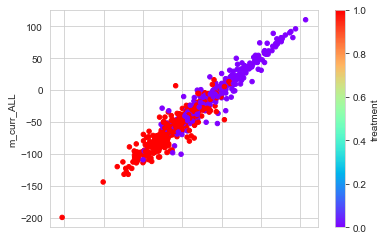

In [12]:
df.plot.scatter(x="m_prio_ALL", y="m_curr_ALL", c="treatment", cmap="rainbow")

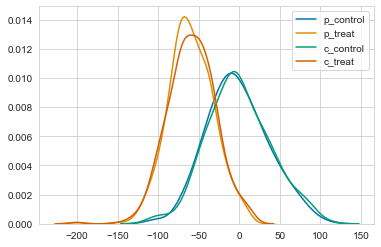

In [13]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_ALL, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_ALL, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_ALL, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_ALL, label="c_treat")
# post treatment 

interpretation for all students: grades decreased in post-treatment. There are more disadvantaged districts than non-disadvantaged districts  in the state overall. 

In [14]:
diff_means(df, 'm_prio_AA')

{'estimated_effect': -40.0532389649924, 'standard_error': 3.9887613570825438}

In [15]:
diff_means(df, 'm_curr_AA')

{'estimated_effect': -40.31063887061075, 'standard_error': 4.254238541923807}

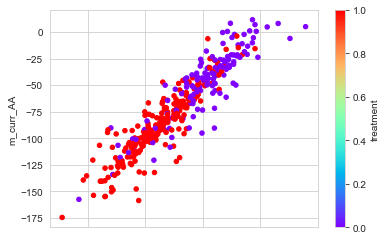

In [16]:
df.plot.scatter(x="m_prio_AA", y="m_curr_AA", c="treatment", cmap="rainbow")

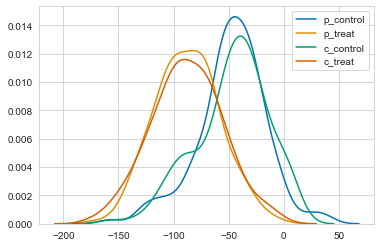

In [17]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_AA, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_AA, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_AA, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_AA, label="c_treat")
# post treatment 

interpretation for African Americans: grades decreased in post-treatment

In [18]:
diff_means(df, 'm_prio_AI')

{'estimated_effect': -37.381457023060804, 'standard_error': 5.060064687334899}

In [19]:
diff_means(df, 'm_curr_AI')

{'estimated_effect': -36.71852544486003, 'standard_error': 4.955771684141176}

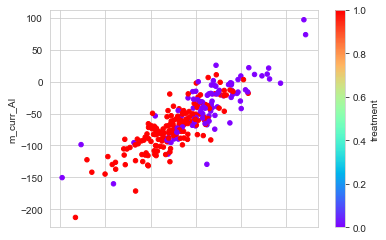

In [20]:
df.plot.scatter(x="m_prio_AI", y="m_curr_AI", c="treatment", cmap="rainbow")

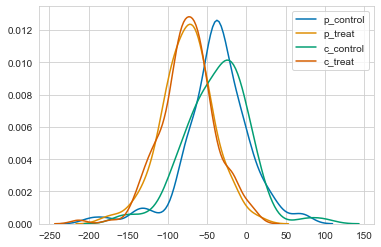

In [21]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_AI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_AI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_AI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_AI, label="c_treat")
# post treatment 

interpretation for American Indians: grades increased in post-treatment

In [22]:
diff_means(df, 'm_prio_AS')

{'estimated_effect': -55.500493105652446, 'standard_error': 5.128562831451714}

In [23]:
diff_means(df, 'm_curr_AS')

{'estimated_effect': -59.55756501182034, 'standard_error': 5.221341484140859}

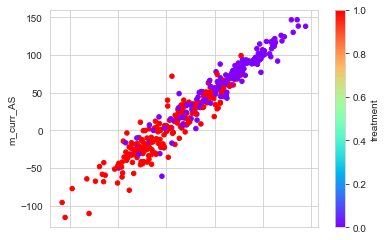

In [24]:
df.plot.scatter(x="m_prio_AS", y="m_curr_AS", c="treatment", cmap="rainbow")

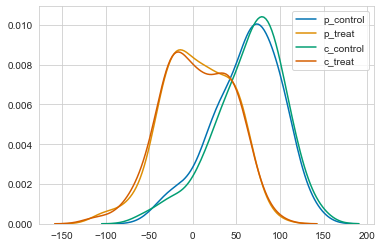

In [25]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_AS, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_AS, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_AS, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_AS, label="c_treat")
# post treatment 

interpretation for Asian Americans: grades decreased in post-treatment

In [26]:
diff_means(df, 'm_prio_EL')

{'estimated_effect': -37.975389096962125, 'standard_error': 5.50320265373783}

In [27]:
diff_means(df, 'm_curr_EL')

{'estimated_effect': -39.093577278336625, 'standard_error': 5.747228401824012}

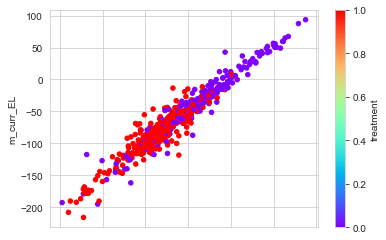

In [28]:
df.plot.scatter(x="m_prio_EL", y="m_curr_EL", c="treatment", cmap="rainbow")

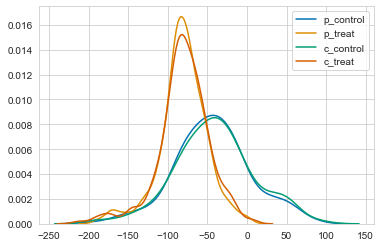

In [29]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_EL, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_EL, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_EL, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_EL, label="c_treat")
# post treatment 

interpretation for English learners: grades decreased in post-treatment

In [30]:
diff_means(df, 'm_prio_FI')

{'estimated_effect': -21.518259700345755, 'standard_error': 3.443028708302919}

In [31]:
diff_means(df, 'm_curr_FI')

{'estimated_effect': -23.855774573852976, 'standard_error': 3.529241948910727}

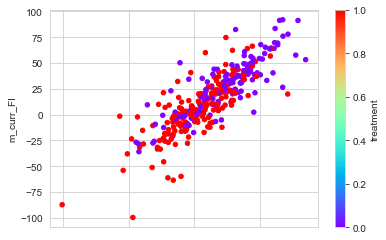

In [32]:
df.plot.scatter(x="m_prio_FI", y="m_curr_FI", c="treatment", cmap="rainbow")

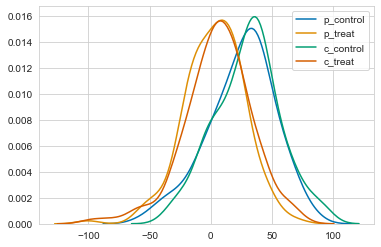

In [33]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_FI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_FI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_FI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_FI, label="c_treat")
# post treatment 

interpretation for Filipino studnets: grades decreased in post-treatment

In [34]:
diff_means(df, 'm_prio_FOS')

{'estimated_effect': -21.843622337161406, 'standard_error': 3.8538788382973244}

In [35]:
diff_means(df, 'm_curr_FOS')

{'estimated_effect': -15.637907801418464, 'standard_error': 3.967087825085255}

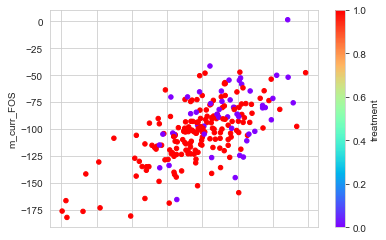

In [36]:
df.plot.scatter(x="m_prio_FOS", y="m_curr_FOS", c="treatment", cmap="rainbow")

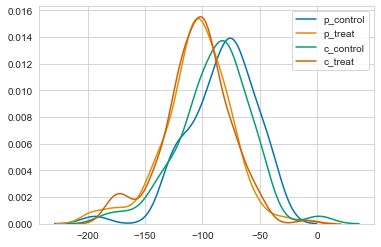

In [37]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_FOS, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_FOS, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_FOS, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_FOS, label="c_treat")
# post treatment 

interpretation for Foster care studnets: grades increased in post-treatment

In [38]:
diff_means(df, 'm_prio_HI')

{'estimated_effect': -33.8292735042735, 'standard_error': 4.051228275172866}

In [39]:
diff_means(df, 'm_curr_HI')

{'estimated_effect': -32.753034532785264, 'standard_error': 4.0545783515386535}

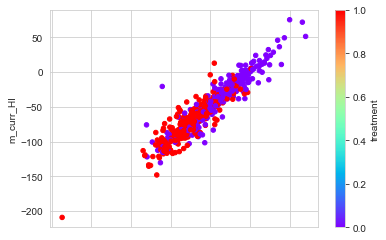

In [40]:
df.plot.scatter(x="m_prio_HI", y="m_curr_HI", c="treatment", cmap="rainbow")

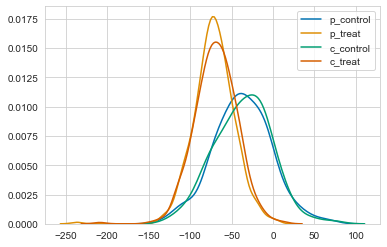

In [41]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_HI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_HI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_HI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_HI, label="c_treat")
# post treatment 

interpretation for Hispanic studnets: grades increased in post-treatment

In [42]:
diff_means(df, 'm_prio_HOM')

{'estimated_effect': -16.872629051620635, 'standard_error': 3.8389541487509367}

In [43]:
diff_means(df, 'm_curr_HOM')

{'estimated_effect': -19.982912812653936, 'standard_error': 4.79483344013261}

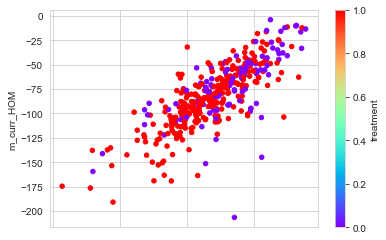

In [44]:
df.plot.scatter(x="m_prio_HOM", y="m_curr_HOM", c="treatment", cmap="rainbow")

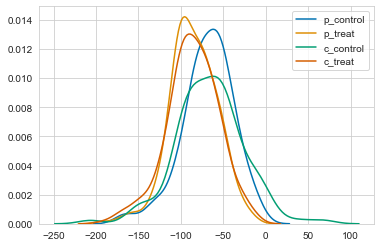

In [45]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_HOM, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_HOM, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_HOM, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_HOM, label="c_treat")
# post treatment 

interpretation for Homeless studnets: grades decreased in post-treatment

In [46]:
diff_means(df, 'm_prio_PI')

{'estimated_effect': -30.37419171866137, 'standard_error': 4.475783633844582}

In [47]:
diff_means(df, 'm_curr_PI')

{'estimated_effect': -28.4824, 'standard_error': 4.662786464129928}

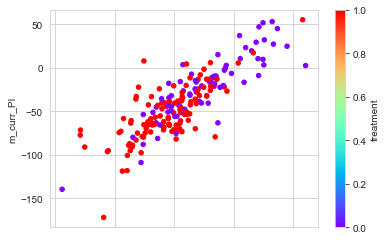

In [48]:
df.plot.scatter(x="m_prio_PI", y="m_curr_PI", c="treatment", cmap="rainbow")

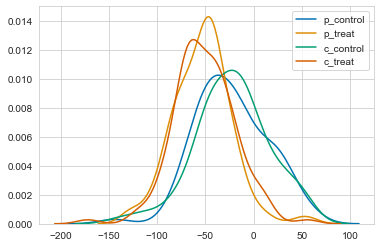

In [49]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_PI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_PI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_PI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_PI, label="c_treat")
# post treatment

interpretation for Pacific Islander studnets: grades increased in post-treatment

In [50]:
diff_means(df, 'm_prio_SED')

{'estimated_effect': -23.609990999099914, 'standard_error': 3.636091776117138}

In [51]:
diff_means(df, 'm_curr_SED')

{'estimated_effect': -26.817099978862814, 'standard_error': 3.8904728126012507}

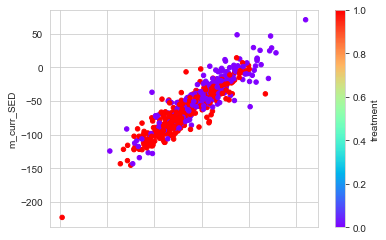

In [52]:
df.plot.scatter(x="m_prio_SED", y="m_curr_SED", c="treatment", cmap="rainbow")

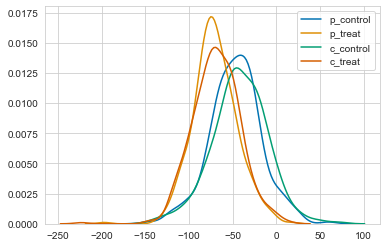

In [53]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_SED, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_SED, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_SED, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_SED, label="c_treat")
# post treatment 

interpretation for socio-economically disadvantaged studnets: grades decreased in post-treatment

In [54]:
diff_means(df, 'm_prio_SWD')

{'estimated_effect': -52.84497223206901, 'standard_error': 5.586209671031256}

In [55]:
diff_means(df, 'm_curr_SWD')

{'estimated_effect': -53.68931681713205, 'standard_error': 5.542895507167516}

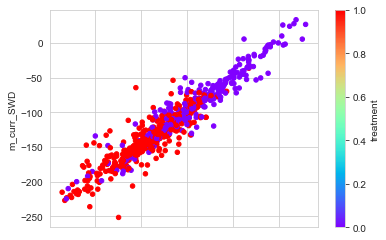

In [56]:
df.plot.scatter(x="m_prio_SWD", y="m_curr_SWD", c="treatment", cmap="rainbow")

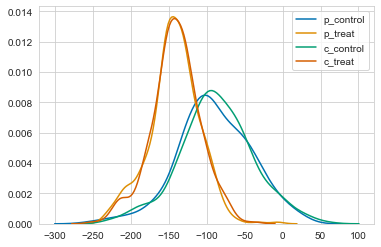

In [57]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_SWD, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_SWD, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_SWD, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_SWD, label="c_treat")
# post treatment 

interpretation for studnets with disabilities: grades decreased in post-treatment

In [58]:
diff_means(df, 'm_prio_WH')

{'estimated_effect': -45.94524499654935, 'standard_error': 4.244808475009679}

In [59]:
diff_means(df, 'm_curr_WH')

{'estimated_effect': -45.69160566232779, 'standard_error': 4.400292829834359}

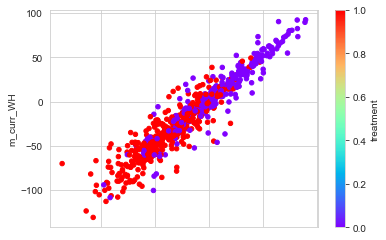

In [60]:
df.plot.scatter(x="m_prio_WH", y="m_curr_WH", c="treatment", cmap="rainbow")

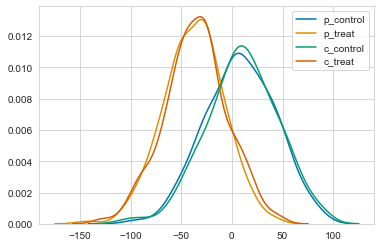

In [61]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_prio_WH, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_prio_WH, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].m_curr_WH, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].m_curr_WH, label="c_treat")
# post treatment 

interpretation for white studnets: grades increased in post-treatment

### English

In [62]:
diff_means(df, 'e_prio_ALL')

{'estimated_effect': -53.64998268141221, 'standard_error': 3.8152704524798704}

In [63]:
diff_means(df, 'e_curr_ALL')

{'estimated_effect': -52.79306119932172, 'standard_error': 3.762994703948995}

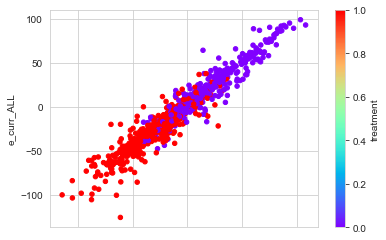

In [64]:
df.plot.scatter(x="e_prio_ALL", y="e_curr_ALL", c="treatment", cmap="rainbow")

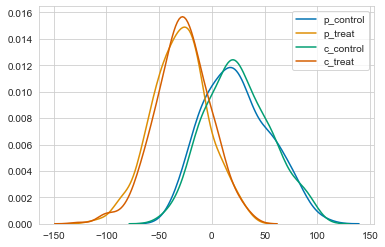

In [65]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_ALL, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_ALL, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_ALL, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_ALL, label="c_treat")
# post treatment 

interpretation for all students: grades increased in post-treatment

In [66]:
diff_means(df, 'e_prio_AA')

{'estimated_effect': -38.145123287671225, 'standard_error': 3.503371758612728}

In [67]:
diff_means(df, 'e_curr_AA')

{'estimated_effect': -36.483143568760006, 'standard_error': 3.733714297158011}

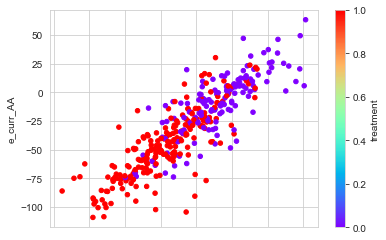

In [68]:
df.plot.scatter(x="e_prio_AA", y="e_curr_AA", c="treatment", cmap="rainbow")

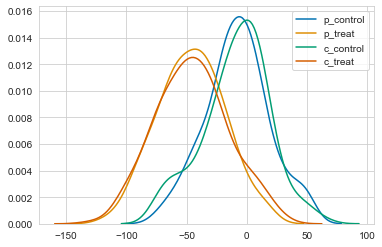

In [69]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_AA, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_AA, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_AA, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_AA, label="c_treat")
# post treatment 

interpretation for African Americans: grades increased in post-treatment

In [70]:
diff_means(df, 'e_prio_AI')

{'estimated_effect': -39.1012788259958, 'standard_error': 4.363258649435077}

In [71]:
diff_means(df, 'e_curr_AI')

{'estimated_effect': -37.12424884106908, 'standard_error': 4.3105360107476445}

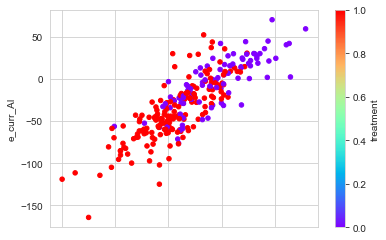

In [72]:
df.plot.scatter(x="e_prio_AI", y="e_curr_AI", c="treatment", cmap="rainbow")

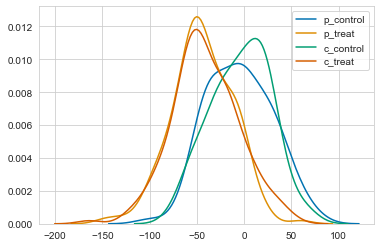

In [73]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_AI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_AI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_AI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_AI, label="c_treat")
# post treatment 

interpretation for American Indians: grades increased in post-treatment

In [74]:
diff_means(df, 'e_prio_AS')

{'estimated_effect': -44.51198748972696, 'standard_error': 4.653887172701351}

In [75]:
diff_means(df, 'e_curr_AS')

{'estimated_effect': -47.40056828514276, 'standard_error': 4.592985055715465}

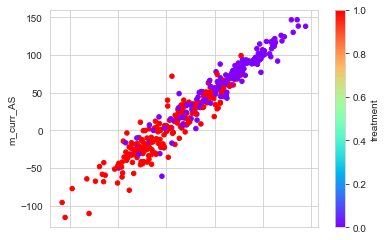

In [76]:
df.plot.scatter(x="m_prio_AS", y="m_curr_AS", c="treatment", cmap="rainbow")

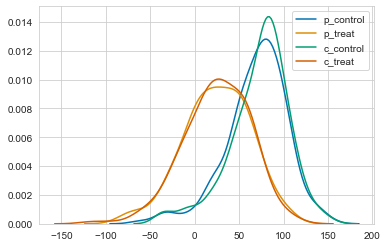

In [77]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_AS, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_AS, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_AS, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_AS, label="c_treat")
# post treatment 

interpretation for Asian Americans: grades decreased in post-treatment

In [78]:
diff_means(df, 'e_prio_EL')

{'estimated_effect': -31.466336523789714, 'standard_error': 3.930052996129383}

In [79]:
diff_means(df, 'e_curr_EL')

{'estimated_effect': -31.329262181668604, 'standard_error': 4.162374357381958}

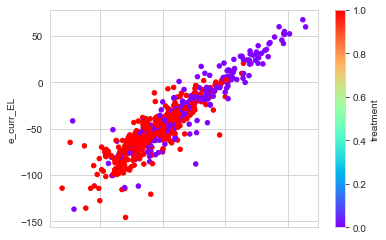

In [80]:
df.plot.scatter(x="e_prio_EL", y="e_curr_EL", c="treatment", cmap="rainbow")

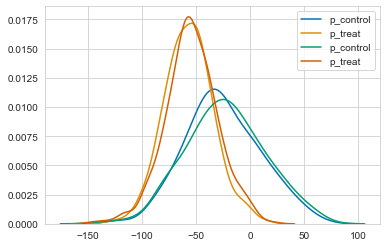

In [81]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_EL, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_EL, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_EL, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_EL, label="p_treat")
# post treatment 

interpretation for English learners: grades increased in post-treatment

In [82]:
diff_means(df, 'e_prio_FI')

{'estimated_effect': -15.121801259027535, 'standard_error': 3.2695071162694807}

In [83]:
diff_means(df, 'e_curr_FI')

{'estimated_effect': -15.782435984080507, 'standard_error': 3.092643619461836}

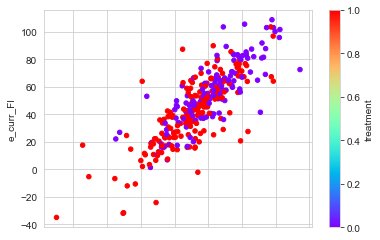

In [84]:
df.plot.scatter(x="e_prio_FI", y="e_curr_FI", c="treatment", cmap="rainbow")

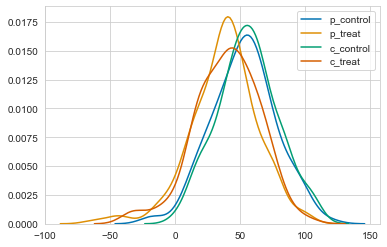

In [85]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_FI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_FI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_FI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_FI, label="c_treat")
# post treatment 

interpretation for Filipino studnets: grades decreased in post-treatment

In [86]:
diff_means(df, 'e_prio_FOS')

{'estimated_effect': -15.906744868035197, 'standard_error': 3.4917499784844397}

In [87]:
diff_means(df, 'e_curr_FOS')

{'estimated_effect': -17.430877192982464, 'standard_error': 3.375660854314773}

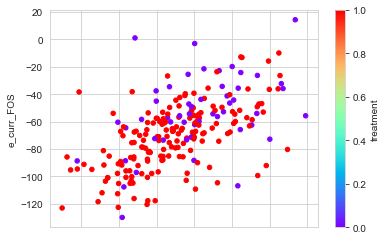

In [88]:
df.plot.scatter(x="e_prio_FOS", y="e_curr_FOS", c="treatment", cmap="rainbow")

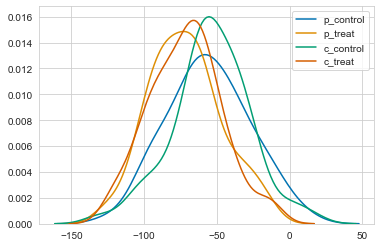

In [89]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_FOS, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_FOS, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_FOS, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_FOS, label="c_treat")
# post treatment 

interpretation for foster care studnets: grades decreased in post-treatment

In [90]:
diff_means(df, 'e_prio_HI')

{'estimated_effect': -33.48717948717949, 'standard_error': 3.4663145239368283}

In [91]:
diff_means(df, 'e_curr_HI')

{'estimated_effect': -31.41361674689879, 'standard_error': 3.352157567495223}

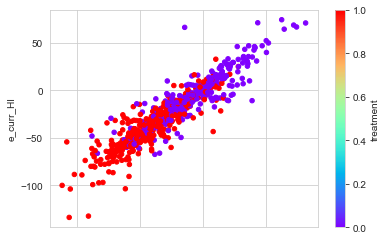

In [92]:
df.plot.scatter(x="e_prio_HI", y="e_curr_HI", c="treatment", cmap="rainbow")

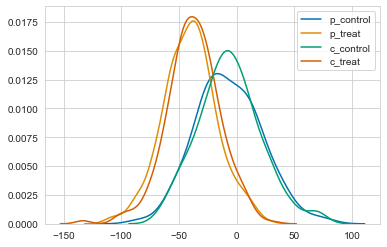

In [93]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_HI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_HI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_HI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_HI, label="c_treat")
# post treatment 

interpretation for Hispanic studnets: grades increased in post-treatment

In [94]:
diff_means(df, 'e_prio_HOM')

{'estimated_effect': -19.835943597778098, 'standard_error': 3.5347009247794596}

In [95]:
diff_means(df, 'e_curr_HOM')

{'estimated_effect': -20.31560881542699, 'standard_error': 4.097259158596481}

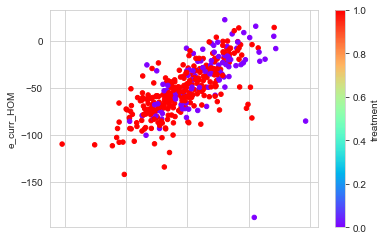

In [96]:
df.plot.scatter(x="e_prio_HOM", y="e_curr_HOM", c="treatment", cmap="rainbow")

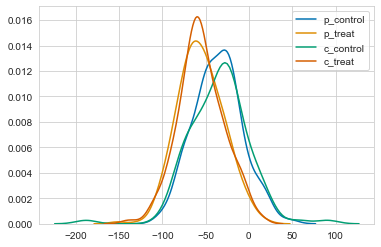

In [97]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_HOM, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_HOM, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_HOM, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_HOM, label="c_treat")
# post treatment 

interpretation for Homeless studnets: grades decreased in post-treatment

In [98]:
diff_means(df, 'e_prio_PI')

{'estimated_effect': -26.903733010612545, 'standard_error': 4.151661939148679}

In [99]:
diff_means(df, 'e_curr_PI')

{'estimated_effect': -18.222774763914003, 'standard_error': 4.402166925175389}

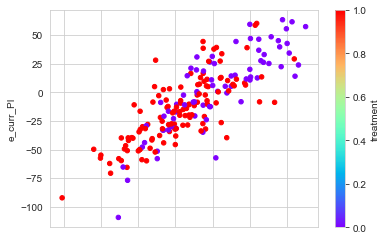

In [100]:
df.plot.scatter(x="e_prio_PI", y="e_curr_PI", c="treatment", cmap="rainbow")

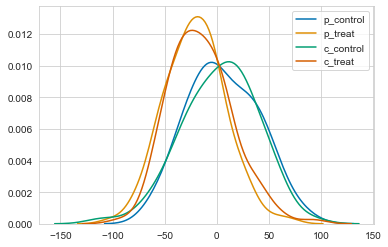

In [101]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_PI, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_PI, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_PI, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_PI, label="c_treat")
# post treatment 

interpretation for Pacific Islander studnets: grades increased in post-treatment

In [102]:
diff_means(df, 'e_prio_SED')

{'estimated_effect': -23.806340634063403, 'standard_error': 3.104387832512892}

In [103]:
diff_means(df, 'e_curr_SED')

{'estimated_effect': -26.401779486366515, 'standard_error': 3.1891656945954536}

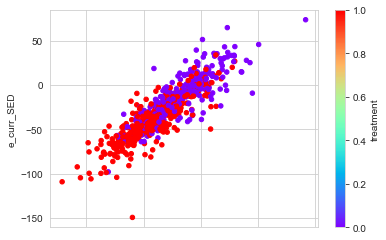

In [104]:
df.plot.scatter(x="e_prio_SED", y="e_curr_SED", c="treatment", cmap="rainbow")

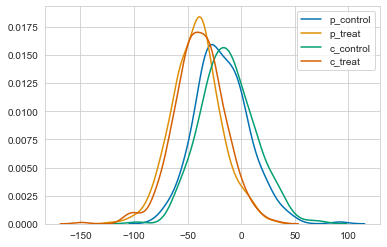

In [105]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_SED, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_SED, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_SED, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_SED, label="c_treat")
# post treatment 

interpretation for socio-economically disadvantaged studnets: grades decreased in post-treatment

In [106]:
diff_means(df, 'e_prio_SWD')

{'estimated_effect': -51.96187522155265, 'standard_error': 4.168133008819173}

In [107]:
diff_means(df, 'e_curr_SWD')

{'estimated_effect': -51.76079572456459, 'standard_error': 4.252638667880396}

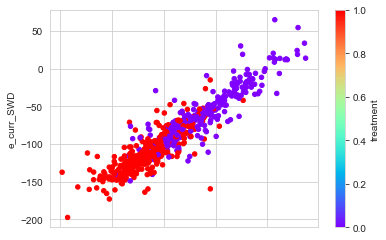

In [108]:
df.plot.scatter(x="e_prio_SWD", y="e_curr_SWD", c="treatment", cmap="rainbow")

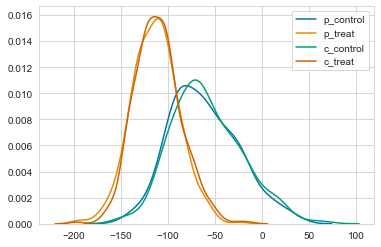

In [109]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_SWD, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_SWD, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_SWD, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_SWD, label="c_treat")
# post treatment 

interpretation for studnets with disabilities: grades increased in post-treatment

In [110]:
diff_means(df, 'e_prio_WH')

{'estimated_effect': -41.29185422401748, 'standard_error': 3.9969622893551358}

In [111]:
diff_means(df, 'e_curr_WH')

{'estimated_effect': -40.5319022805426, 'standard_error': 3.937785018813516}

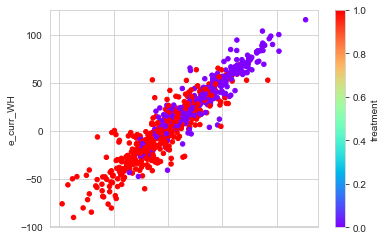

In [112]:
df.plot.scatter(x="e_prio_WH", y="e_curr_WH", c="treatment", cmap="rainbow")

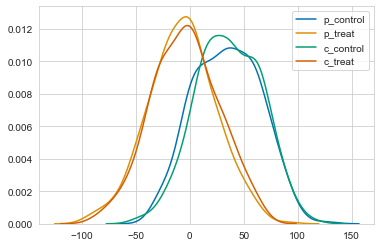

In [113]:
sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_prio_WH, label="p_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_prio_WH, label="p_treat")
# pre treatment 

sns.kdeplot(df.loc[lambda df: df.treatment == 0].e_curr_WH, label="c_control")
sns.kdeplot(df.loc[lambda df: df.treatment == 1].e_curr_WH, label="c_treat")
# post treatment 